# Lending Club Case Study

In [168]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Reading the CSV file

In [169]:
df = pd.read_csv('loan.csv') #Reading the CSV as dataframes
df.head()
#printing the first 5 rows

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Reading the columns datatype and null counts

In [170]:
df.info(verbose='False',null_counts=True) # column details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

### Dropping the columns which doesnt have values in it (non-null count is 0)

In [171]:
missing_columns = [col for col in df.columns if df[col].isna().sum()==39717] #Here total row length is 39717
print(missing_columns)
print(len(missing_columns))
df = df.drop(axis=1, columns=missing_columns)

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

In [172]:
df.info(verbose='False',null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [173]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

### Delete the rows where loan status is Current

Here the main concern of our analysis is to identify the borrowers who are defaulter, so the borrowers who is paying the loan currently will not add any value to the analysis.

In [174]:
df.drop(df.index[df['loan_status'] == 'Current'], inplace=True)

In [175]:
df.shape

(38577, 57)

### mapping the categorical values to integer for easy analysis and visualization

Fully Paid ==> 0
Charged Off ==> 1

In [176]:
df['loan_status']=df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
df["loan_status"]=df["loan_status"].astype('int64')

### Removing the columns which has single unique value

In [177]:
df['pymnt_plan'].unique() # it doesn't add any value to the dataset since it has only one value 'n'

array(['n'], dtype=object)

In [178]:
df=df.drop(axis=1,columns=['pymnt_plan'])

In [179]:
df.shape

(38577, 56)

In [180]:
df['application_type'].unique()  # it doesn't add any value to the dataset since it has only one value 'INDIVIDUAL'

array(['INDIVIDUAL'], dtype=object)

In [181]:
df=df.drop(axis=1,columns=['application_type'])
df.shape

(38577, 55)

In [182]:
df['initial_list_status'].nunique()

1

In [183]:
df=df.drop(axis=1,columns=['initial_list_status'])

In [184]:
df['policy_code'].unique()

array([1])

In [185]:
df=df.drop(axis=1,columns=['policy_code'])

#### the customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

removing the following customer behavior variables

delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

earliest_cr_line - The month the borrower's earliest reported credit line was opened

inq_last_6mths - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

open_acc - The number of open credit lines in the borrower's credit file.

pub_rec - Number of derogatory public records

revol_bal - Total credit revolving balance

revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

total_acc - The total number of credit lines currently in the borrower's credit file

out_prncp - Remaining outstanding principal for total amount funded

out_prncp_inv - Remaining outstanding principal for portion of total amount funded by investors

total_pymnt - Payments received to date for total amount funded

total_pymnt_inv - Payments received to date for portion of total amount funded by investors

total_rec_prncp - Principal received to date

total_rec_int - Interest received to date

total_rec_late_fee - Late fees received to date

recoveries - post charge off gross recovery

collection_recovery_fee - post charge off collection fee

last_pymnt_d - Last month payment was received

last_pymnt_amnt - Last total payment amount received

last_credit_pull_d - The most recent month LC pulled credit for 

In [186]:
df=df.drop(axis=1,columns=['next_pymnt_d','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'])
df.shape

(38577, 32)

In [187]:
df.info(verbose='False',null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

### converting Object type to appropriate Datatype for better Analysis

In [188]:
df["term"]=df["term"].apply(lambda x: x.rstrip(' months') if ' months' in x else x)
df["term"]=df["term"].astype('int64')
df["term"].tail()

39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, dtype: int64

In [189]:
df['int_rate']=df['int_rate'].apply(lambda x: x.rstrip('%') if '%' in x else x)
df["int_rate"]=df["int_rate"].astype('float64')
df["int_rate"].tail()

39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, dtype: float64

In [190]:
df["annual_inc"]=df["annual_inc"].astype('int64')
df["annual_inc"].tail()

39712    110000
39713     18000
39714    100000
39715    200000
39716     22000
Name: annual_inc, dtype: int64

In [191]:
df['issue_d']=pd.to_datetime(df['issue_d'])


In [192]:
df.shape

(38577, 32)

In [193]:
for i in df.columns:
  print(i,df[i].nunique())

id 38577
member_id 38577
loan_amnt 870
funded_amnt 1019
funded_amnt_inv 8050
term 2
int_rate 370
installment 15022
grade 7
sub_grade 35
emp_title 28027
emp_length 11
home_ownership 5
annual_inc 5185
verification_status 3
issue_d 55
loan_status 2
url 38577
desc 25803
purpose 14
title 19297
zip_code 822
addr_state 50
dti 2853
mths_since_last_delinq 95
mths_since_last_record 111
collections_12_mths_ex_med 1
acc_now_delinq 1
chargeoff_within_12_mths 1
delinq_amnt 1
pub_rec_bankruptcies 3
tax_liens 1


### Removing the columns which has single unique value

In [194]:
df['acc_now_delinq'].unique()


array([0])

In [195]:
df['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [196]:
df['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [197]:
df['delinq_amnt'].unique()

array([0])

In [198]:
df['tax_liens'].unique()

array([ 0., nan])

In [199]:
df=df.drop(axis=1,columns=['acc_now_delinq','delinq_amnt','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'])

In [200]:
df.info(verbose='False',null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      38577 non-null  int64         
 1   member_id               38577 non-null  int64         
 2   loan_amnt               38577 non-null  int64         
 3   funded_amnt             38577 non-null  int64         
 4   funded_amnt_inv         38577 non-null  float64       
 5   term                    38577 non-null  int64         
 6   int_rate                38577 non-null  float64       
 7   installment             38577 non-null  float64       
 8   grade                   38577 non-null  object        
 9   sub_grade               38577 non-null  object        
 10  emp_title               36191 non-null  object        
 11  emp_length              37544 non-null  object        
 12  home_ownership          38577 non-null  object

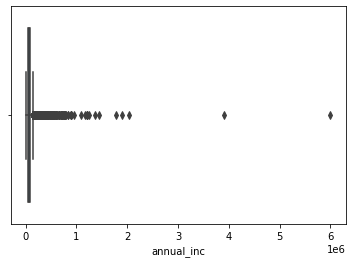

In [201]:
sns.boxplot(df['annual_inc'])
#plt.xlim(0, 1000000)
plt.show()


Analysis: The above plot shows that "annual_inc" has lot of outliers

In [202]:
df['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

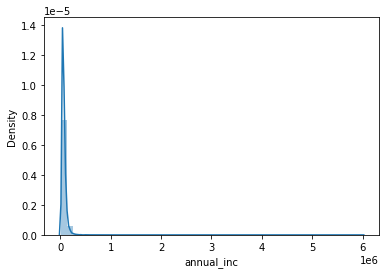

In [203]:
sns.distplot(df['annual_inc'])
plt.show()

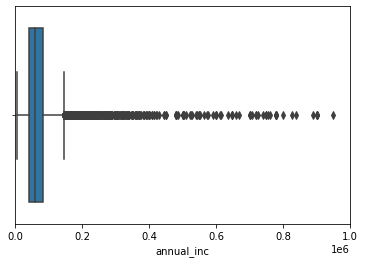

In [204]:
sns.boxplot(df['annual_inc'])
plt.xlim(0,1000000)
plt.show()

<AxesSubplot:xlabel='term', ylabel='count'>

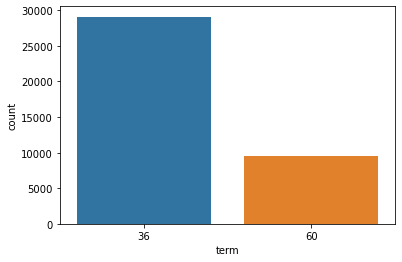

In [205]:
sns.countplot(df['term'])

**Analysis**: the above plot shows that the dataset mostly contains the records for the loan opted for 36 months

In [206]:
df["loan_status"].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

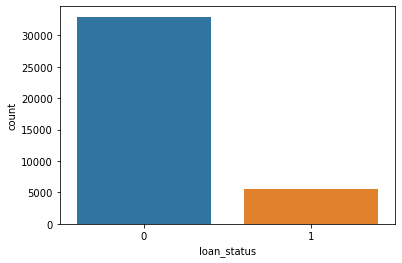

In [207]:
sns.countplot(df["loan_status"])
plt.show()

**Analysis**: the above plots shows that the dataset mostly contains the records for the fully paid categories

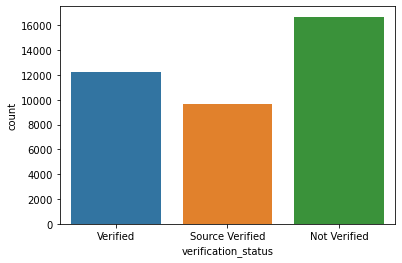

In [208]:
sns.countplot(df["verification_status"])
plt.show()

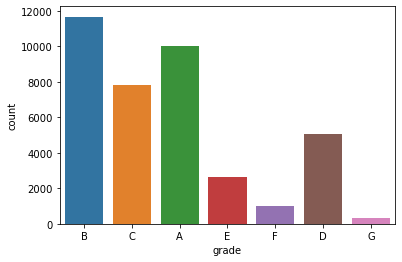

In [209]:

sns.countplot(df["grade"])
plt.show()

**Analysis**: the above plots shows that the dataset has the most occurences of Grade B

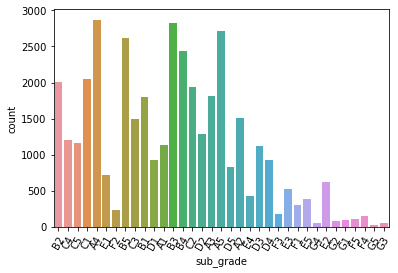

In [210]:
sns.countplot(df["sub_grade"])
plt.xticks(rotation=60)
plt.show()

**Analysis**: the above plots shows that the dataset has the most occurences of subgrade is A4

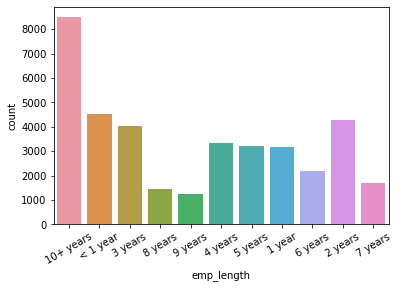

In [211]:
sns.countplot(df["emp_length"])
plt.xticks(rotation=30)
plt.show()

**Analysis**: Most of the borrowers who applied loans have 10+ years of experience

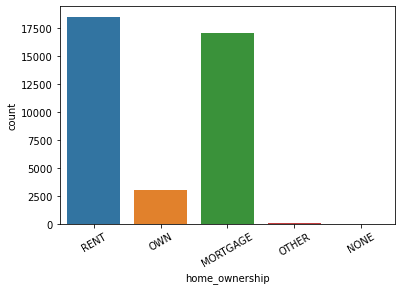

In [212]:
sns.countplot(df["home_ownership"])
plt.xticks(rotation=30)
plt.show()

**Analysis**: Most of the borrowers who resides in rented property

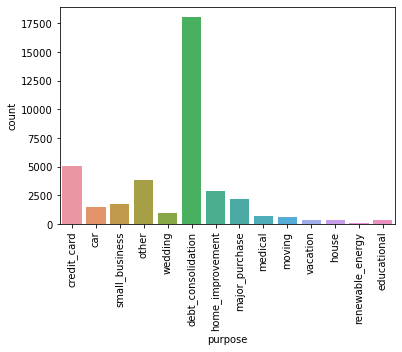

In [213]:
sns.countplot(df["purpose"])
plt.xticks(rotation=90)
plt.show()


**Analysis**: Most of the borrowers applied loan for debt consolidation

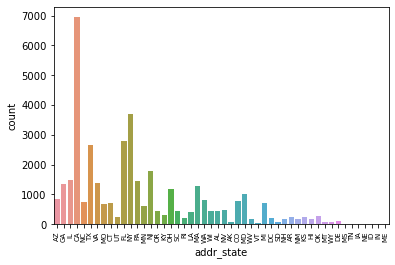

In [214]:

sns.countplot(df["addr_state"])
plt.xticks(rotation=90,fontsize=7)
plt.show()


**Analysis**: Most of the borrowers applied loan from CA

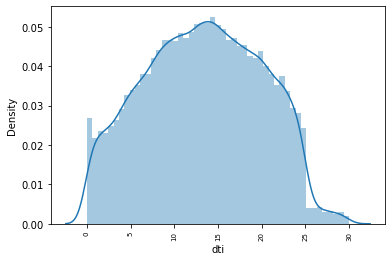

In [215]:
sns.distplot(df["dti"])
plt.xticks(rotation=90,fontsize=7)
plt.show()

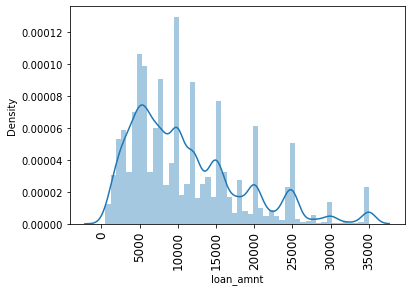

In [216]:
sns.distplot(df["loan_amnt"])
plt.xticks(rotation=90,fontsize=12)
plt.show()

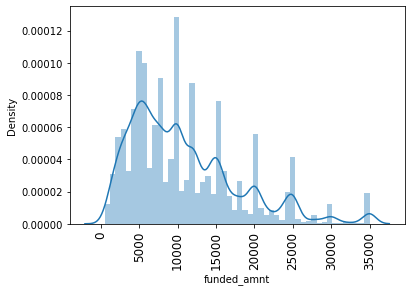

In [217]:
sns.distplot(df["funded_amnt"])
plt.xticks(rotation=90,fontsize=12)
plt.show()

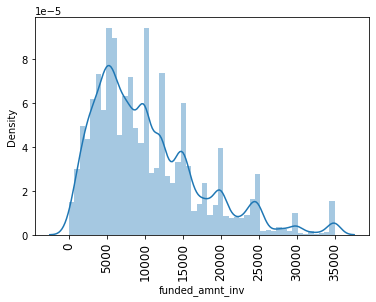

In [218]:
sns.distplot(df["funded_amnt_inv"])
plt.xticks(rotation=90,fontsize=12)
plt.show()

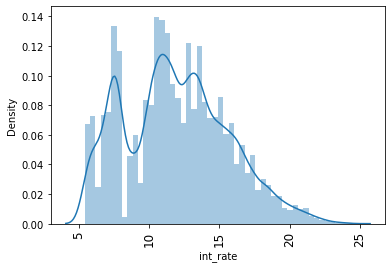

In [219]:
sns.distplot(df["int_rate"])
plt.xticks(rotation=90,fontsize=12)
plt.show()

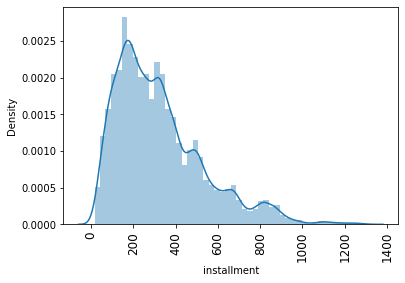

In [220]:
sns.distplot(df["installment"])
plt.xticks(rotation=90,fontsize=12)
plt.show()

In [221]:
fully_paid_df=df[df['loan_status']== 0]

In [222]:
Charged_off_df=df[df['loan_status']==1]

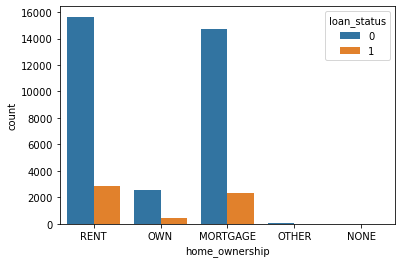

In [223]:
sns.countplot(hue=df['loan_status'],x=df['home_ownership'])
plt.show()

**Analysis**:  The borrowers who has own house has the less changes of defaulting the loan

**Recommendation**: The borrowers with own house can be granted loan

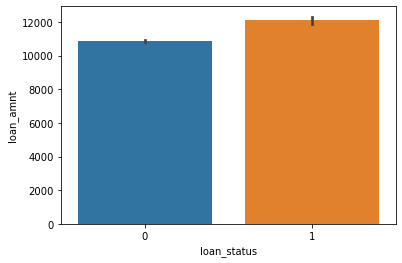

In [224]:
sns.barplot(x=df['loan_status'],y=df['loan_amnt'])
plt.show()

**Analysis**: The chances of defaulting is high when loan amount is greater than 11000

**Recommendation**: it is always recommended to consider multiple parameters when loan is offered above 11000

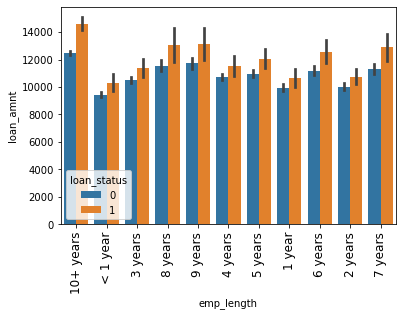

In [225]:
sns.barplot(hue=df['loan_status'],x=df['emp_length'],y=df['loan_amnt'])
plt.xticks(rotation=90,fontsize=12)
plt.show()

**Analysis**:the borrowers with 10+ years experience are offered higher loans

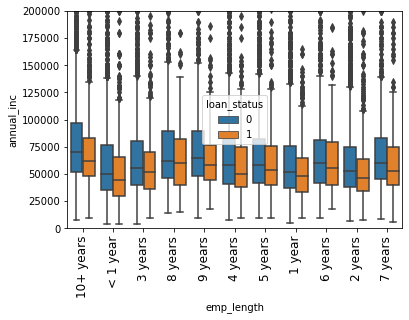

In [226]:
sns.boxplot(x=df['emp_length'],y=df['annual_inc'],hue=df['loan_status'])
plt.xticks(rotation=90,fontsize=12)
plt.ylim(0,200000)
plt.show()

**Recommendation**: The borrowers with annual income greater than 90000 income can be approved loans as they are not defaulting

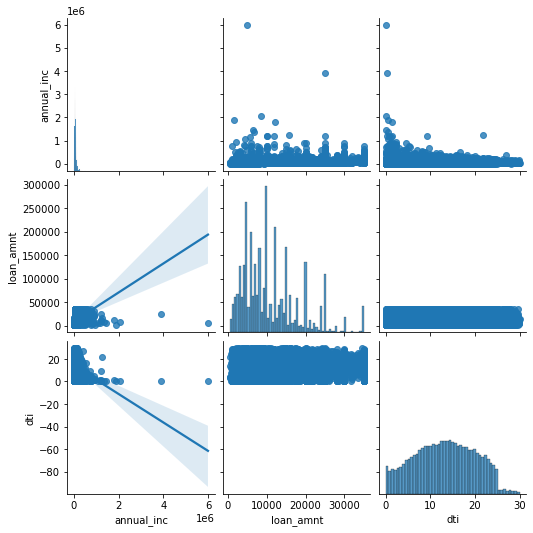

In [227]:
cols_to_plot=['annual_inc','loan_amnt','dti']
sns.pairplot(df[cols_to_plot],kind="reg")
plt.show()

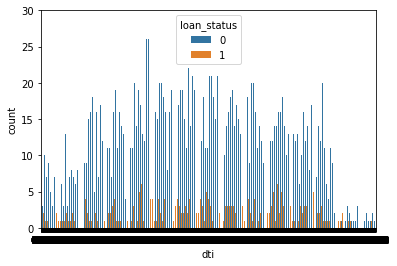

In [228]:
sns.countplot(hue=df['loan_status'],x=df['dti'])
plt.ylim(0,30)
plt.show()

**Analysis**:dti is directly proportional to loan status

**Recommendation**: The borrowers with dti greater than 7 can be offered loan as they will not default

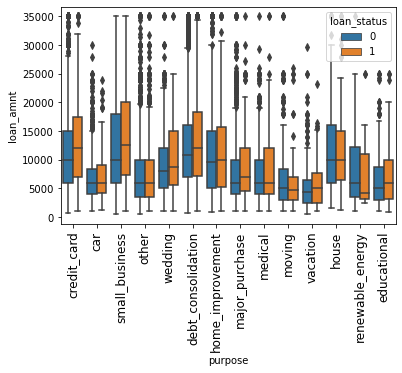

In [229]:
sns.boxplot(x=df['purpose'],y=df['loan_amnt'],hue=df['loan_status'])
plt.xticks(rotation=90,fontsize=12)
plt.show()

**Analysis**:the chances of defaulting is less when the purpose is "renewable_enery","house" and "moving"

**Recommendation**:Loans on the purpose "renewable_enery","house" and "moving" are profitable as they are less likely to default

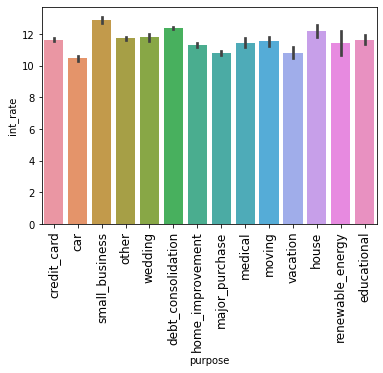

In [230]:
sns.barplot(x=df['purpose'],y=df['int_rate'])
plt.xticks(rotation=90,fontsize=12)
plt.show()

**Analysis**:The interest rate is high for small Business

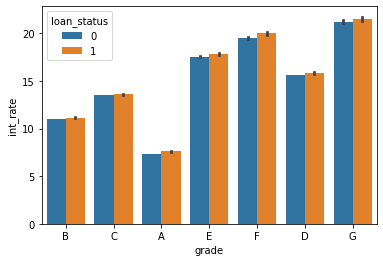

In [231]:
sns.barplot(y=df['int_rate'],x=df['grade'],hue=df['loan_status'])
plt.show()

**Analysis**: the grade is high "A" when the interest rate is less

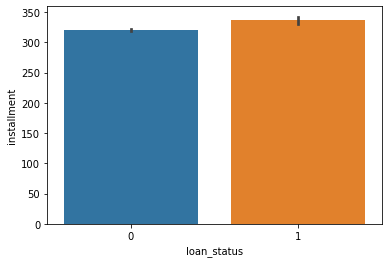

In [232]:
sns.barplot(x=df['loan_status'],y=df['installment'])
plt.show()

**Analysis**: the defaulting is high when the installment is greater than 325

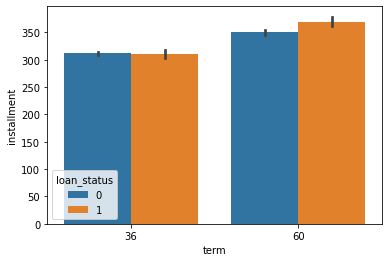

In [233]:
sns.barplot(y=df['installment'],x=df['term'],hue=df['loan_status'])
plt.show()

**Recommendation**: the installments can be maintained within 325 for 60 months term

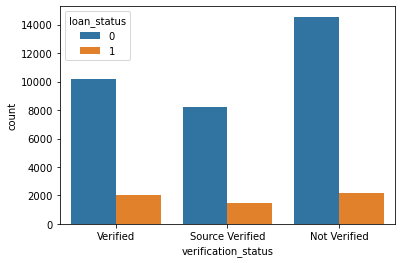

In [234]:
sns.countplot(hue=df['loan_status'],x=df['verification_status'])
plt.show()

**analysis**: not verified verification status has greater chance of defaulting

**Recommendation**: it is always recommended to do source verification